In [28]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [29]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [30]:
print(train_images.shape[1:])

(28, 28)


In [31]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [6]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [32]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 5.7740 - accuracy: 0.8775 - val_loss: 0.6617 - val_accuracy: 0.9318
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.4287 - accuracy: 0.9468 - val_loss: 0.5024 - val_accuracy: 0.9272
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2581 - accuracy: 0.9601 - val_loss: 0.3914 - val_accuracy: 0.9430
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1923 - accuracy: 0.9676 - val_loss: 0.3164 - val_accuracy: 0.9476
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1717 - accuracy: 0.9728 - val_loss: 0.3201 - val_accuracy: 0.9594
Epoch 6/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1520 - accuracy: 0.9764 - val_loss: 0.3236 - val_accuracy: 0.9612
Epoch 7/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1475 - accuracy: 0.9776 - val_loss: 0.3825 - val_accuracy: 0.9640

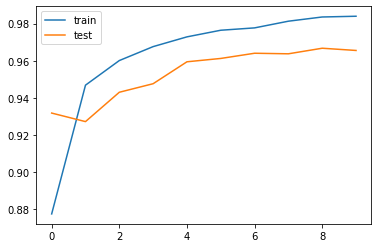

In [34]:
##ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

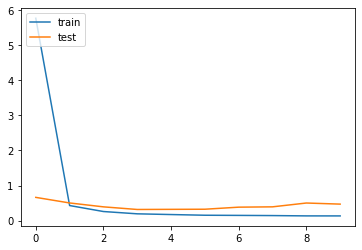

In [35]:
## LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
model.predict_classes(test_data[503].reshape(1,784))

array([2])

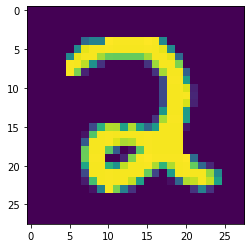

In [37]:
plt.imshow(test_data[503].reshape(28,28))

In [38]:
model.predict_classes(test_data[523].reshape(1,784))

array([1])

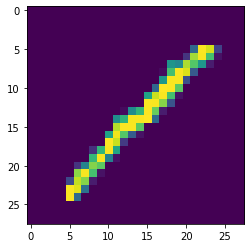

In [39]:
plt.imshow(test_data[523].reshape(28,28))

In [40]:
model.predict_classes(test_data[221].reshape(1,784))

array([2])

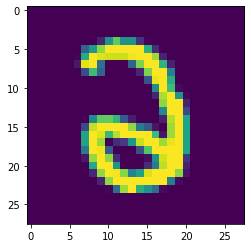

In [41]:
plt.imshow(test_data[221].reshape(28,28))